# Modelo econométrico  para previsão dos gastos da previdência social 
 Utilizando o método SARIMA e Holt Winters

In [1]:
# Importando as principais bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.dates as mdates
import numpy as np
import statsmodels.api as sm

In [29]:
# Criando o DF
df = pd.read_excel("df_serie.xlsx")
df['Data'] = pd.to_datetime(df['Data'])
df.set_index('Data', inplace=True)

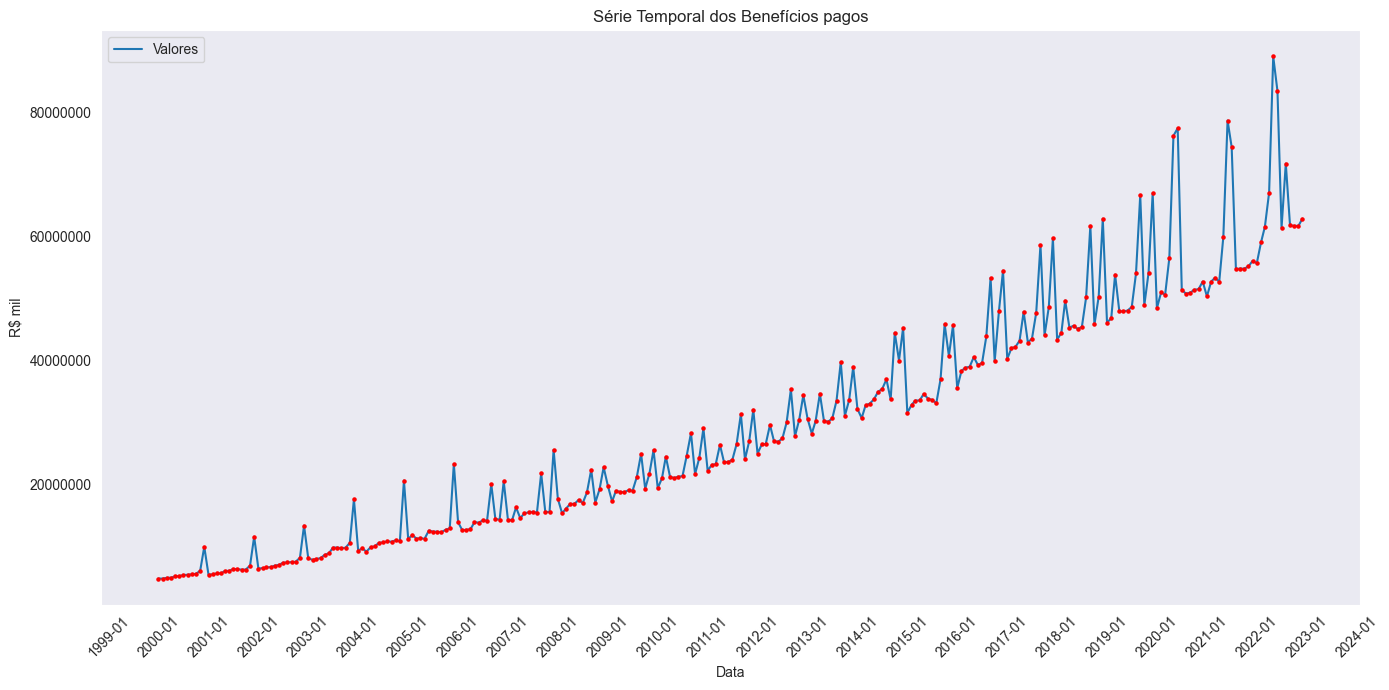

In [30]:
# Plotando o gráfico da série temporal
plt.figure(figsize=(14, 7))
sns.lineplot(x=df.index, y=df['Benefícios'], label='Valores')
plt.scatter(df.index, df['Benefícios'], color='red', s=5, zorder=5)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.xticks(rotation=45)


plt.title('Série Temporal dos Benefícios pagos')
plt.xlabel('Data')
plt.ylabel('R$ mil')
plt.tight_layout()
plt.grid(False)
plt.show()


O gráfico indica que os gastos de previdência social está com uma grande tendência de crescimento ao longo das duas últimas décadas e também é possível observar que existe um efeito sazonal. Portanto, sugere que a série não é estacionária.

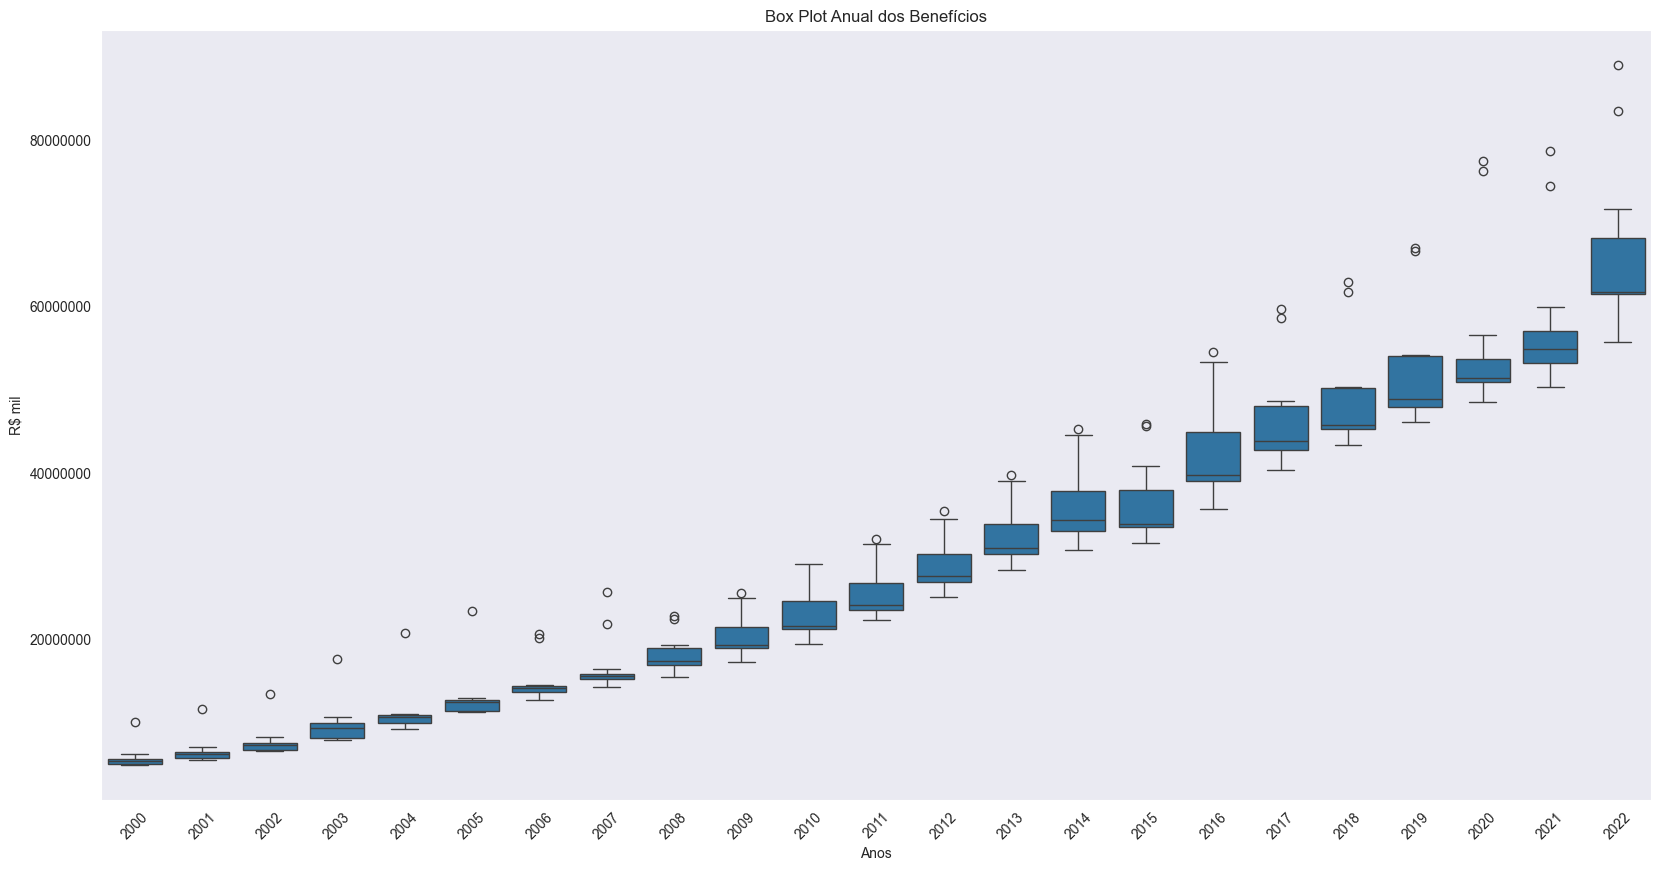

In [31]:
# Criando gráfico Box Plot anual
df['Ano'] = df.index.year


plt.figure(figsize=(20, 10))
sns.boxplot(x='Ano', y='Benefícios', data=df)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.title('Box Plot Anual dos Benefícios')
plt.xlabel('Anos')
plt.ylabel('R$ mil')
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

Confirmando a hipótese  de crescimento dos gastos ao longo da série e também sendo possível verificar que se torna mais dispersa ao decorrer do tempo. 

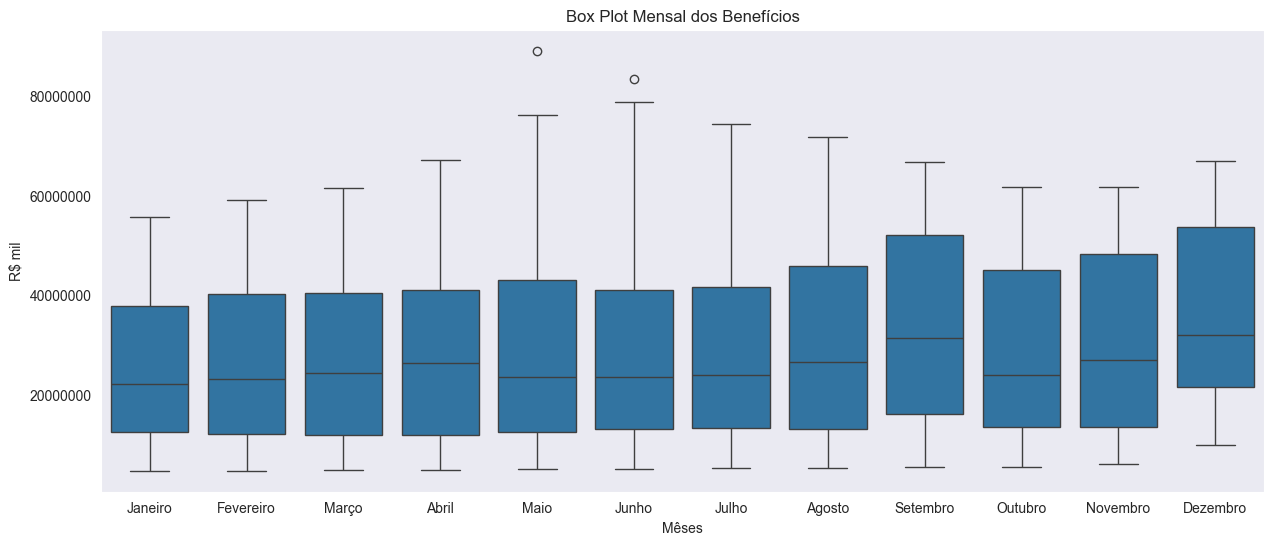

In [32]:
# Analisando efeito sazonal por meio do Box Plot
meses = {1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
         7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'}

df['Mês'] = df.index.month.map(meses)


plt.figure(figsize=(15, 6))
sns.boxplot(x='Mês', y='Benefícios', data=df)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.title('Box Plot Mensal dos Benefícios')
plt.xlabel('Mêses')
plt.ylabel('R$ mil')
plt.grid(False)
plt.show()


É possível observar que, no primeiro semestre do ano, os valores se mantêm numa média estável de 20 bilhões de reais, com Março e Abril apresentando a maior variação. Além disso, verifica-se que Maio e Junho são os únicos meses com outliers, aproximadamente 80 bilhões de reais, valores muito acima dos demais. No segundo semestre, observa-se um crescimento dos gastos em Agosto, acelerando em Setembro, seguido de uma queda em Outubro, e um aumento contínuo até Dezembro.

Conclui-se que existe um efeito sazonal devido ao pagamento do 13º salário. A primeira parcela, cuja data de pagamento varia, geralmente ocorre em Setembro, mas pode ser antecipada entre Maio e Julho. A segunda parcela é paga em Dezembro, tornando este mês, junto com Setembro, o de maior média de pagamento. Assim, o modelo SARIMA é o mais adequado para esse cenário.

In [33]:
# Decompondo a série para novas análises
serie_temporal = df['Benefícios']
decomposicao = sm.tsa.seasonal_decompose(serie_temporal, model='additive')

<Figure size 2000x1000 with 0 Axes>

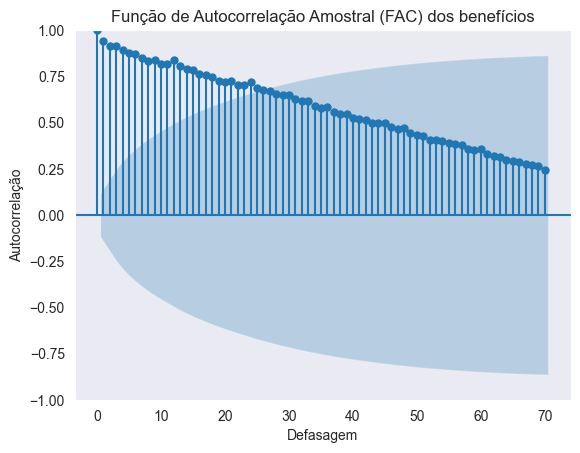

In [34]:
# Criando gráfico de FAC
plt.figure(figsize=(20, 10))
plot_acf(serie_temporal, lags=70)
plt.title('Função de Autocorrelação Amostral (FAC) dos benefícios')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação')
plt.grid(False)
plt.show()


Existe uma autocorrelação das observações que vão caindo gradativamente conforme aumenta os Lags

<Figure size 2000x1000 with 0 Axes>

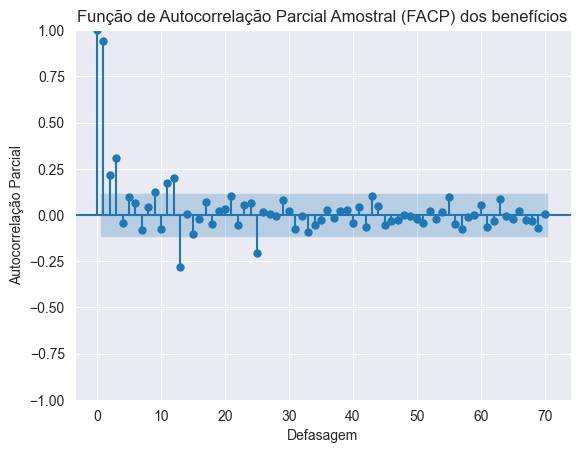

In [35]:
# Criando gráfico FACP
plt.figure(figsize=(20, 10))
plot_pacf(serie_temporal, lags=70)  
plt.title('Função de Autocorrelação Parcial Amostral (FACP) dos benefícios')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação Parcial')
plt.show()

Novamente  indicando a presença de autocorrelação da série temporal

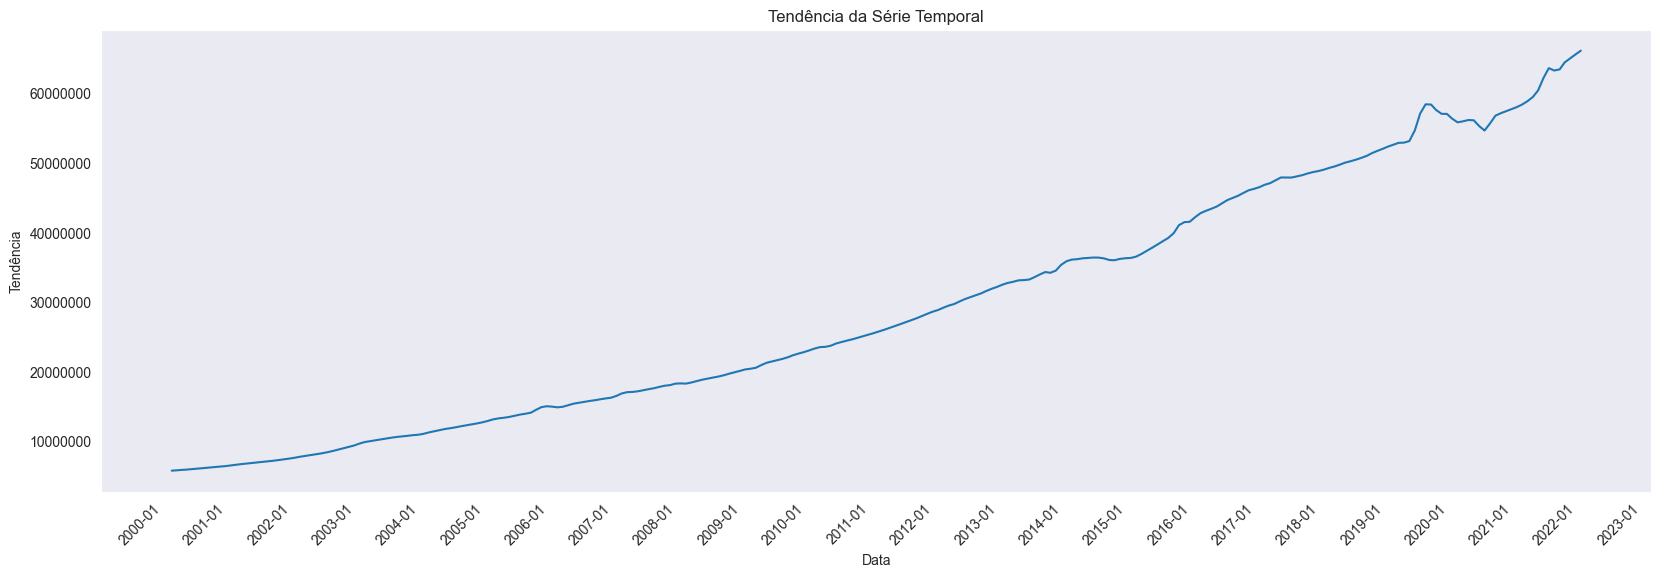

In [36]:
# Gráfico de tendência
plt.figure(figsize=(20, 6))
sns.lineplot(data=decomposicao.trend)
plt.title('Tendência da Série Temporal')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.xlabel('Data')
plt.ylabel('Tendência')
plt.grid(False)
plt.xticks(rotation=45)
plt.show()

Reforçando a hipótese de tendência de crescimento dos gastos

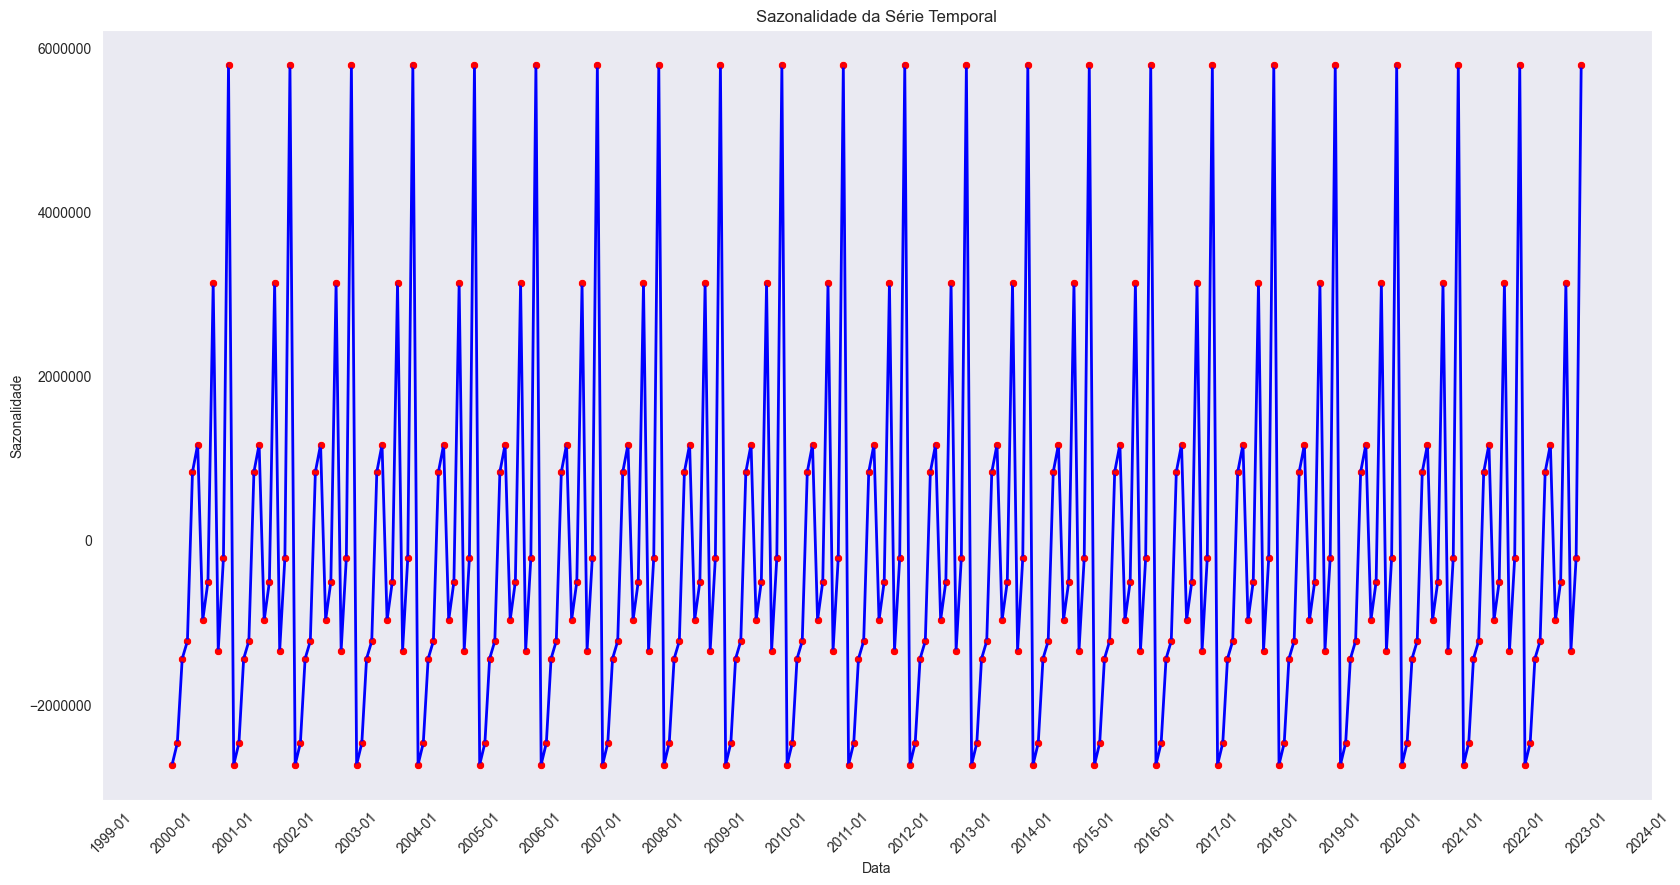

In [37]:
# Gráfico de Sazonalidade
plt.figure(figsize=(20, 10))
sns.lineplot(data=decomposicao.seasonal, color='blue', linewidth=2)
sns.scatterplot(data=decomposicao.seasonal, color='red', marker='o')
plt.scatter(decomposicao.seasonal.index, decomposicao.seasonal.values, color='red', s=5, zorder=5)
plt.title('Sazonalidade da Série Temporal')
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.xlabel('Data')
plt.grid(False)
plt.ylabel('Sazonalidade')
plt.xticks(rotation=45)
plt.show()


Confirmando que existe sazonalidade na série que deve ser considerada na metodologia do modelo econométrico que será escolhido

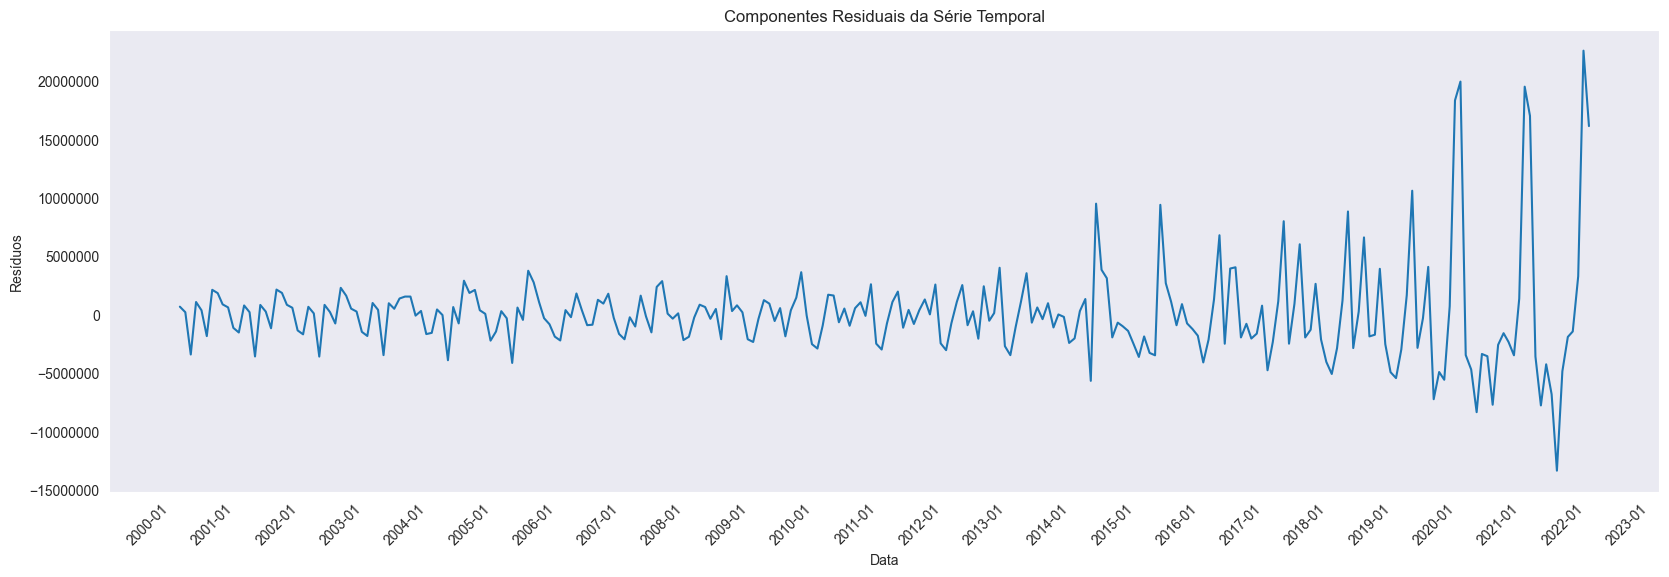

In [ ]:
# Gráfico de ruído
plt.figure(figsize=(20,6))
sns.lineplot(data=decomposicao.resid)
plt.title('Componentes Residuais da Série Temporal')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.xlabel('Data')
plt.grid(False)
plt.ylabel('Resíduos')
plt.xticks(rotation=45)
plt.show()

# EXPLORAR APOS 2016 E 2020

Demonstra que conforme se avança a série os resíduos se tornam mais dispersos 

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
# Realizando teste de hipótese de estacionalidade
df3= pd.read_excel("df_serie.xlsx")
df3['Data'] = pd.to_datetime(df3['Data'])
df3.set_index('Data', inplace=True)
result= adfuller(df3)
print(f'P-valor {result[1]}')

P-valor 1.0


O teste indica que a série não é estacionária, uma vez que o p-valor é maior que 5%

In [41]:
# Realizando uma diferenciação na série para corrigir a estacionalidade
df3= df3.diff()
df3=df3.dropna()
result2= adfuller(df3)
print(f'P-valor {result2[1]}')

P-valor 4.136726281987993e-15


Após o processo de diferenciação, o teste ADF sugere que a hipótese nula foi rejeitada indicando existir que a série é estacionária

<Figure size 2000x600 with 0 Axes>

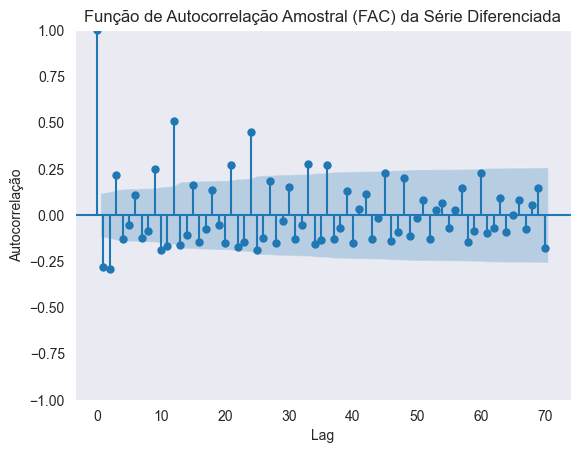

In [42]:
# Novo gráfico FAC
plt.figure(figsize=(20, 6))
plot_acf(df3, lags=70)
plt.title('Função de Autocorrelação Amostral (FAC) da Série Diferenciada')
plt.xlabel('Lag')
plt.ylabel('Autocorrelação')
plt.grid(False)
plt.show()

Após a diferenciação é possível verificar que o comportamento está próximo de uma série estacionária

<Figure size 2000x1000 with 0 Axes>

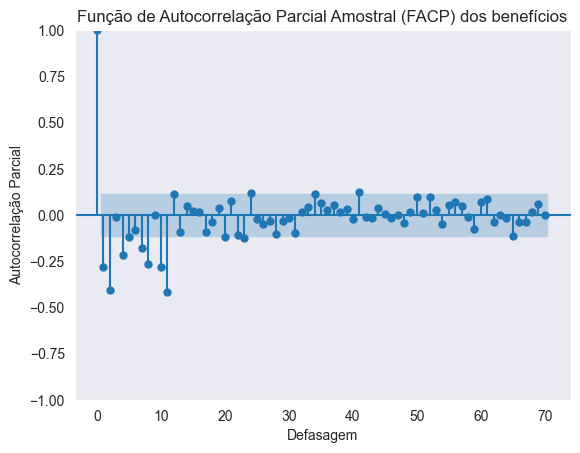

In [43]:
# Novo gráfico FACP
plt.figure(figsize=(20, 10))
plot_pacf(df3, lags=70)  # Define o número de lags para calcular a FACP
plt.title('Função de Autocorrelação Parcial Amostral (FACP) dos benefícios')
plt.xlabel('Defasagem')
plt.ylabel('Autocorrelação Parcial')
plt.grid(False)
plt.show()

Novamente indicando que o processo de diferenciação realizou com sucesso o problema da série não estacionária

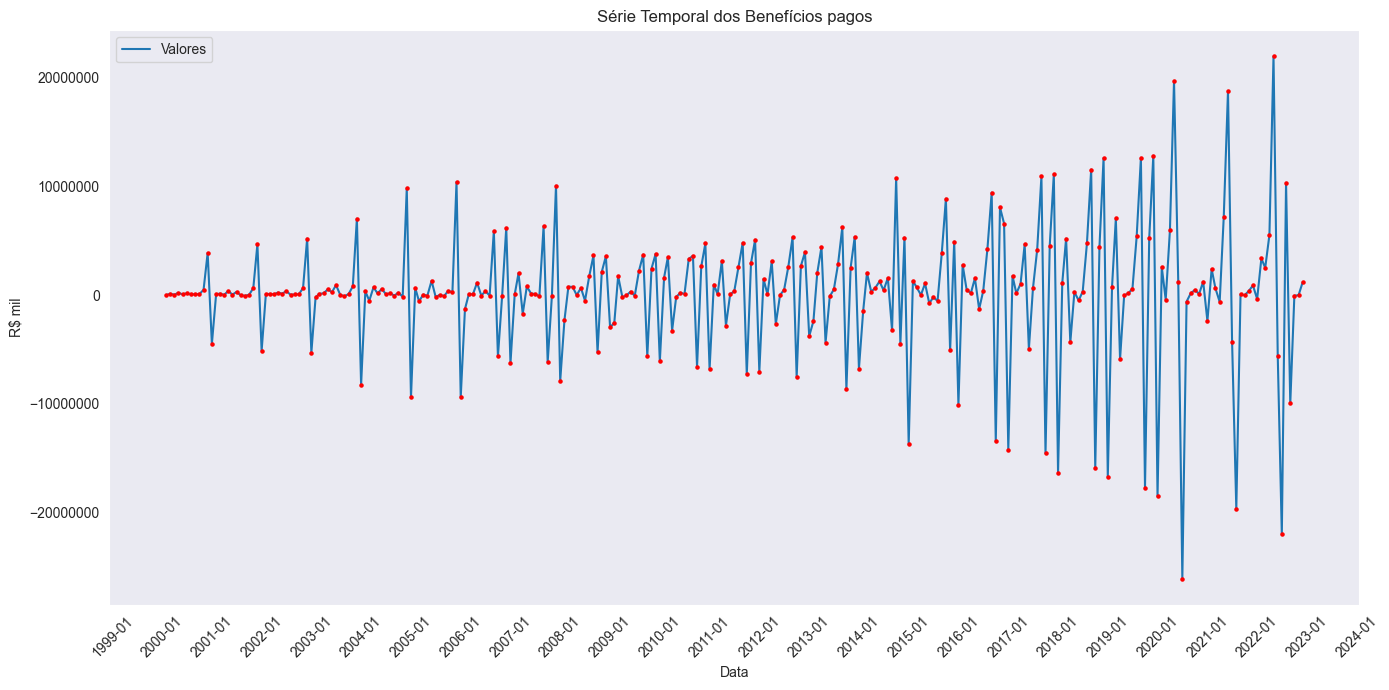

In [44]:
# Novo gráfico de série temporal
plt.figure(figsize=(14, 7))
sns.lineplot(x=df3.index, y=df3['Benefícios'], label='Valores')
plt.scatter(df3.index, df3['Benefícios'], color='red', s=5, zorder=5)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.xticks(rotation=45)


plt.title('Série Temporal dos Benefícios pagos')
plt.xlabel('Data')
plt.ylabel('R$ mil')

# Mostrar o gráfico
plt.tight_layout()
plt.grid(False)
plt.show()


Observa-se que a série se comporta como estacionária tendo sazonalidade e conforme aumenta os anos a variação se torna mais forte

In [45]:
# Importando bibliotecas para estimar os erros
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [46]:
# Criando uma função para um parâmetro de erro
def mean_percentage_error(Y,y):
    mpe = np.mean((Y - y )/ Y) * 100
    return mpe

In [47]:
# Função para criar DF com valores dos erros
def teste_erro(serie,previsao):

    MAD = mean_absolute_error(y_true=serie,y_pred=previsao)
    MAPE = mean_absolute_percentage_error(y_true=serie,y_pred=previsao)
    MSD = mean_squared_error(y_true=serie,y_pred=previsao)
    MPE = mean_percentage_error(serie,previsao)

    erros = pd.DataFrame({
        'Metric': ['MAD', 'MAPE', 'MSD', 'MPE'],
        'Value': [MAD, MAPE, MSD, MPE]
    })
    
    return erros

In [48]:
# Biblioteca para criar o modelo SARIMA
from pmdarima.arima import auto_arima

In [49]:
# Pegando df sem alterações
df5 = pd.read_excel("df_serie.xlsx")
df5['Data'] = pd.to_datetime(df5['Data'])
df5.set_index('Data', inplace=True)

In [ ]:
# Realizando auto arima para obter os melhores parâmetros 
stepwise_model = auto_arima(df5, start_p=0, start_q=0,max_p=3, max_q=2, m=12, start_P=0,start_Q=0, seasonal=True, d=1, D=2, trace=True, error_action='ignore',
                            suppress_warnings=True, stepwise=True)

# tESTAR ATE 4 LAGS MENOR AIC,BIC E MAIOR LOG LIKELIHOOD

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,2,0)[12]             : AIC=8733.895, Time=0.10 sec
 ARIMA(1,1,0)(1,2,0)[12]             : AIC=8624.562, Time=0.44 sec
 ARIMA(0,1,1)(0,2,1)[12]             : AIC=8551.379, Time=0.56 sec
 ARIMA(0,1,1)(0,2,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,1)(1,2,1)[12]             : AIC=8539.386, Time=0.88 sec
 ARIMA(0,1,1)(1,2,0)[12]             : AIC=8576.460, Time=0.58 sec
 ARIMA(0,1,1)(2,2,1)[12]             : AIC=8539.090, Time=2.55 sec
 ARIMA(0,1,1)(2,2,0)[12]             : AIC=8544.312, Time=1.42 sec
 ARIMA(0,1,1)(2,2,2)[12]             : AIC=8540.275, Time=2.30 sec
 ARIMA(0,1,1)(1,2,2)[12]             : AIC=8539.670, Time=2.96 sec
 ARIMA(0,1,0)(2,2,1)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(1,1,1)(2,2,1)[12]             : AIC=inf, Time=3.67 sec
 ARIMA(0,1,2)(2,2,1)[12]             : AIC=8506.126, Time=3.32 sec
 ARIMA(0,1,2)(1,2,1)[12]             : AIC=8505.692, Time=0.87 sec
 ARIMA(0,1,2)(0,2,1)[12]          

In [51]:
# Criando o modelo encontrado no auto ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df5, order=(0, 1, 2), seasonal_order=(0, 2, 2, 12))
model_fit = model.fit(disp=False)
model_fit.summary()

/Users/victor/Desktop/curso python/Serietemporalprev/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victor/Desktop/curso python/Serietemporalprev/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victor/Desktop/curso python/Serietemporalprev/.venv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Benefícios   No. Observations:                  276
Model:             SARIMAX(0, 1, 2)x(0, 2, 2, 12)   Log Likelihood               -4247.325
Date:                            Thu, 30 May 2024   AIC                           8504.649
Time:                                    11:03:51   BIC                           8522.276
Sample:                                01-01-2000   HQIC                          8511.743
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6298      0.100     -6.325      0.000      -0.825      -0.435
ma.L2         -0.3317      0.091     -3.654      0.000      -0.510      -0.154
ma.S.L12      -1.2759      0.118    -10.794      0.000      -1.508      -1.044
ma.S.L24       0.4185      0.143      2.932      0.003       0.139       0.698
sigma2      5.514e+13   9.95e-16   5.54e+28      0.000    5.51e+13    5.51e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               717.27
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):              21.47   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.42e+44. Standard errors may be unstable.
"""

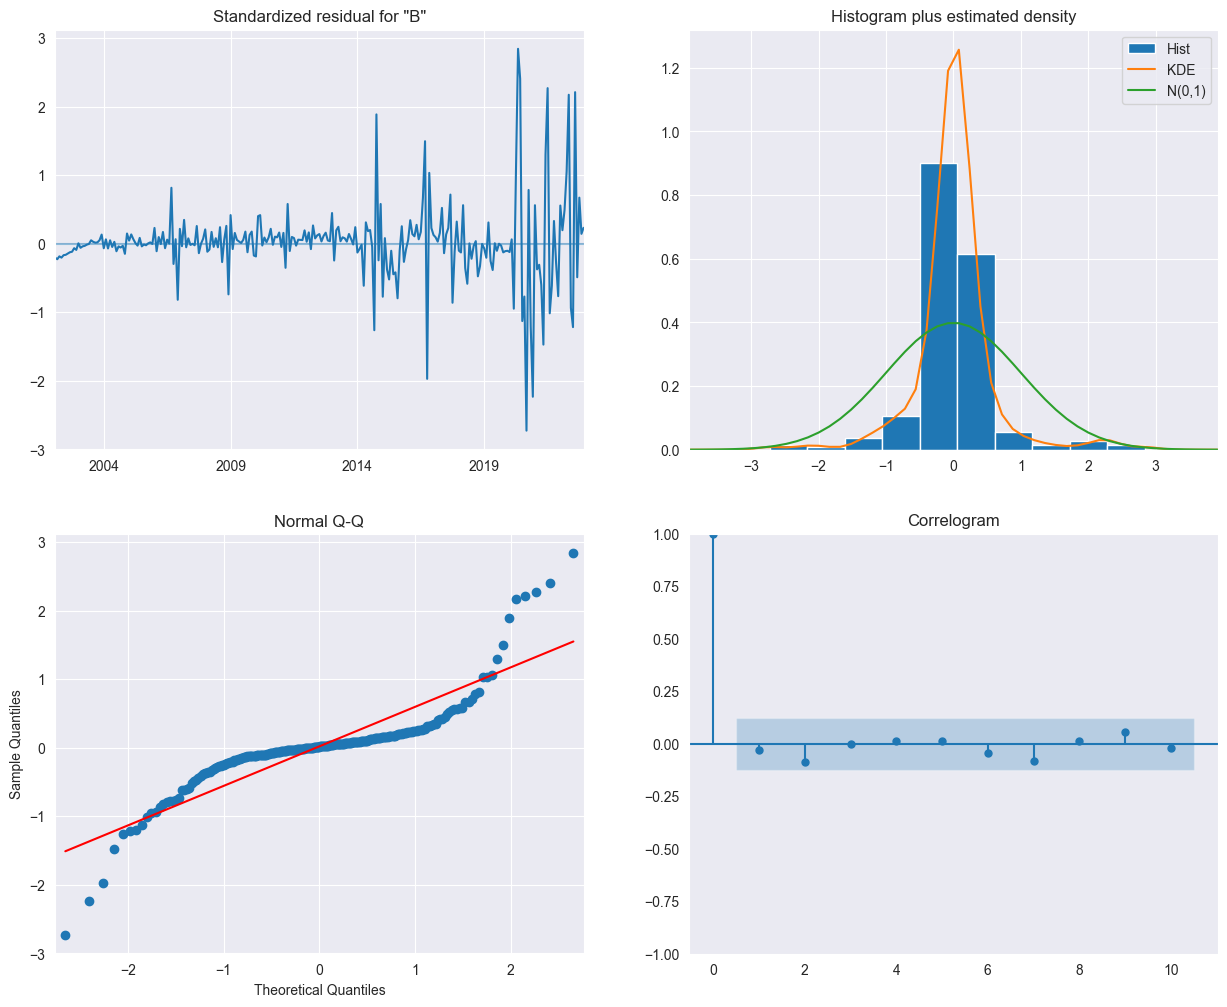

In [52]:
model_fit.plot_diagnostics(figsize=(15, 12))
plt.grid(False)
plt.show()

É possível observar que apesar da distribuição dos erros está proxima da distribuição normal, ainda está presente problemas com autocorrelação dos erros e heterocedasticidade

In [53]:
df5['fitted'] = model_fit.fittedvalues

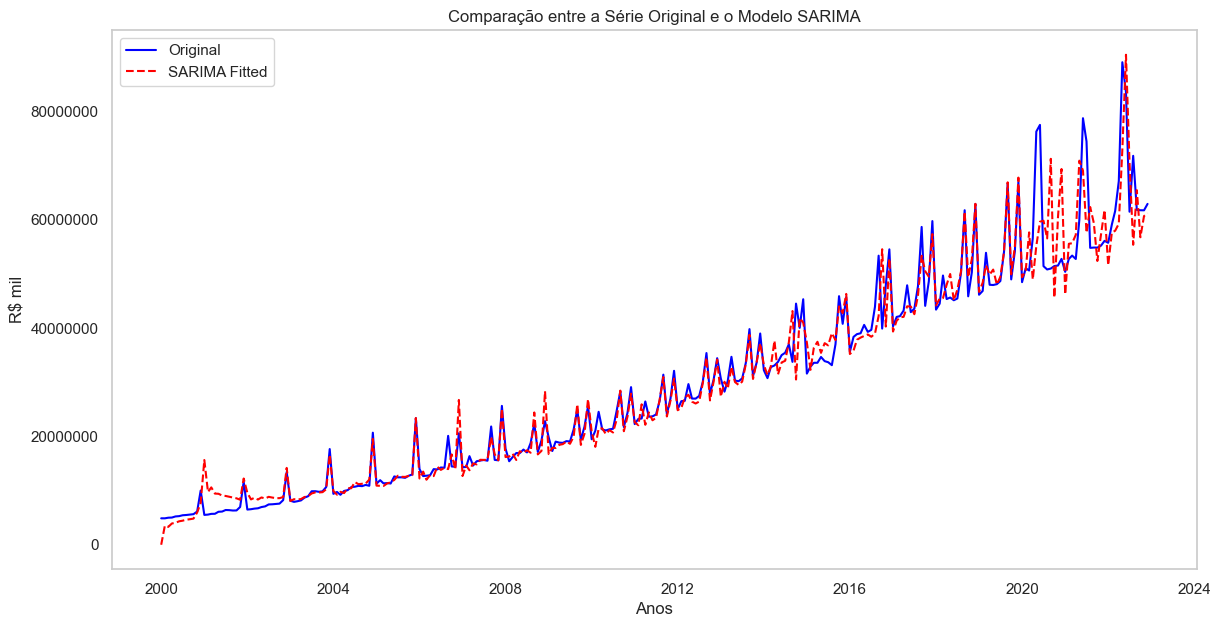

In [54]:
sns.set(style="whitegrid")

# Plotando a série original e os valores ajustados pelo modelo
plt.figure(figsize=(14, 7))
plt.tight_layout()
sns.lineplot(data=df5, x=df5.index, y='Benefícios', label='Original', color='blue')
sns.lineplot(data=df5, x=df5.index, y='fitted', label='SARIMA Fitted', color='red', linestyle='--')
plt.title('Comparação entre a Série Original e o Modelo SARIMA')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.xlabel('Anos')
plt.ylabel('R$ mil')
plt.grid(False) 
plt.legend()
plt.show()

O resultado pode ser considerado bastante satisfatório, demonstrando que, em grande parte da série, o modelo se aproxima dos dados reais. No entanto, no início, os valores previstos ficaram acima dos reais, e no período entre 2020 e 2022, as previsões ficaram bastante distantes. Isso pode ser explicado pelo adiantamento do 13º salário devido à pandemia de Covid-19 e pelo aumento dos picos em razão das consequências da doença, que pressionaram o aumento da seguridade social.

In [55]:
# Realizando o teste dos erros
t1 = teste_erro(df5['Benefícios'],df5['fitted'])
t1

,Metric,Value
0,MAD,2.354719e+06
1,MAPE,9.986008e-02
2,MSD,1.761681e+13
3,MPE,-1.962621e+00


Os resultados dos erros demonstram que foi possível obter um modelo sólido apesar da dificuldade de estimar os danos da pandemia 

In [56]:
# Biblioteca para Holt Winters
from statsmodels.tsa.api import ExponentialSmoothing

In [57]:
# DF sem alterações
df2= pd.read_excel("df_serie.xlsx")
df2['Data'] = pd.to_datetime(df2['Data'])
df2.set_index('Data', inplace=True)

In [58]:
# Realizando o Modelo Holt Winters
df2.index.freq = 'MS'
model_fit2 = ExponentialSmoothing(df2, seasonal_periods=12, trend='additive', seasonal='additive', use_boxcox=True).fit()

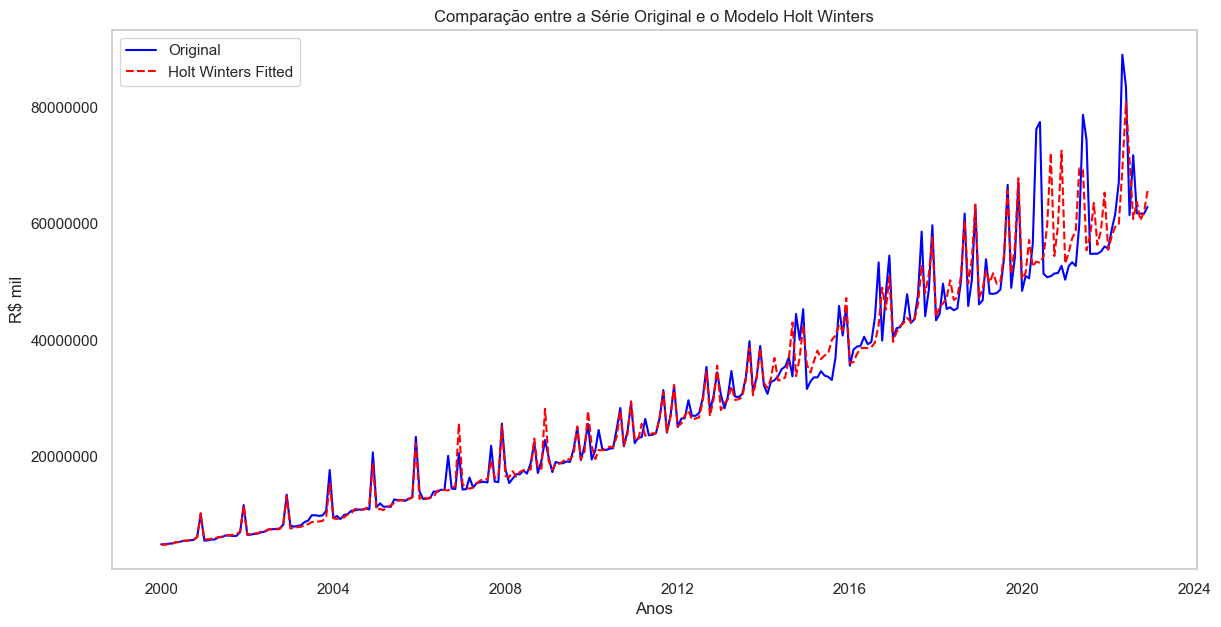

In [59]:
df2['fitted'] = model_fit2.fittedvalues
sns.set(style="whitegrid")

# Plotando a série original e os valores ajustados pelo modelo
plt.figure(figsize=(14, 7))
plt.tight_layout()
sns.lineplot(data=df2, x=df2.index, y='Benefícios', label='Original', color='blue')
sns.lineplot(data=df2, x=df2.index, y='fitted', label='Holt Winters Fitted', color='red', linestyle='--')
plt.title('Comparação entre a Série Original e o Modelo Holt Winters')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.xlabel('Anos')
plt.ylabel('R$ mil')
plt.grid(False) 
plt.legend()
plt.show()

Com a utilização do método de suavização exponencial com o modelo Holt Winters é possível obter uma melhora comparado ao SARIMA. Os pontos destaque positivos são uma maior aproximação dos dados reais entre 2000 até final de 2019, porém ainda com dificuldade de estimar a série durante a crise da Covid-19.

In [60]:
# Obtendo os parâmetros de suavização
alpha = model_fit2.params.get('smoothing_level', None)
beta = model_fit2.params.get('smoothing_slope', None)
gamma = model_fit2.params.get('smoothing_seasonal', None)

# Imprimindo os parâmetros
print(f"Alpha (nível de suavização): {alpha}")
print(f"Beta (tendência de suavização): {beta}")
print(f"Gamma (sazonalidade de suavização): {gamma}")

Alpha (nível de suavização): 0.023650115737840195
Beta (tendência de suavização): None
Gamma (sazonalidade de suavização): 0.5456289443218812


É possível verificar que o parâmetro Gamma teve maior peso nesse modelo devido ao forte fator sazonal presente e Alpha pequeno demonstrando menor importância para os valores mais novos. 

In [61]:
# Sumário do modelo
model_fit2.summary()

Dep. Variable:,Benefícios,No. Observations:,276
Model:,ExponentialSmoothing,SSE,4691976365626404.000
Optimized:,True,AIC,8440.127
Trend:,Additive,BIC,8498.054
Seasonal:,Additive,AICC,8442.789
Seasonal Periods:,12,Date:,"Thu, 30 May 2024"
Box-Cox:,True,Time:,11:03:54
Box-Cox Coeff.:,0.30396,,
,coeff,code,optimized
smoothing_level,0.0236501,alpha,True
smoothing_trend,9.1485e-09,beta,True


In [62]:
# Realizando os teste dos erros
t2 = teste_erro(df2['Benefícios'],df2['fitted'])

Uma melhora considerável comparado modelo SARIMA

/var/folders/f0/r1mlkllj4z14dx7__963964m0000gn/T/ipykernel_4444/4230997189.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=df2.index[-1], periods=forecast_periods+1, freq='M')[1:]


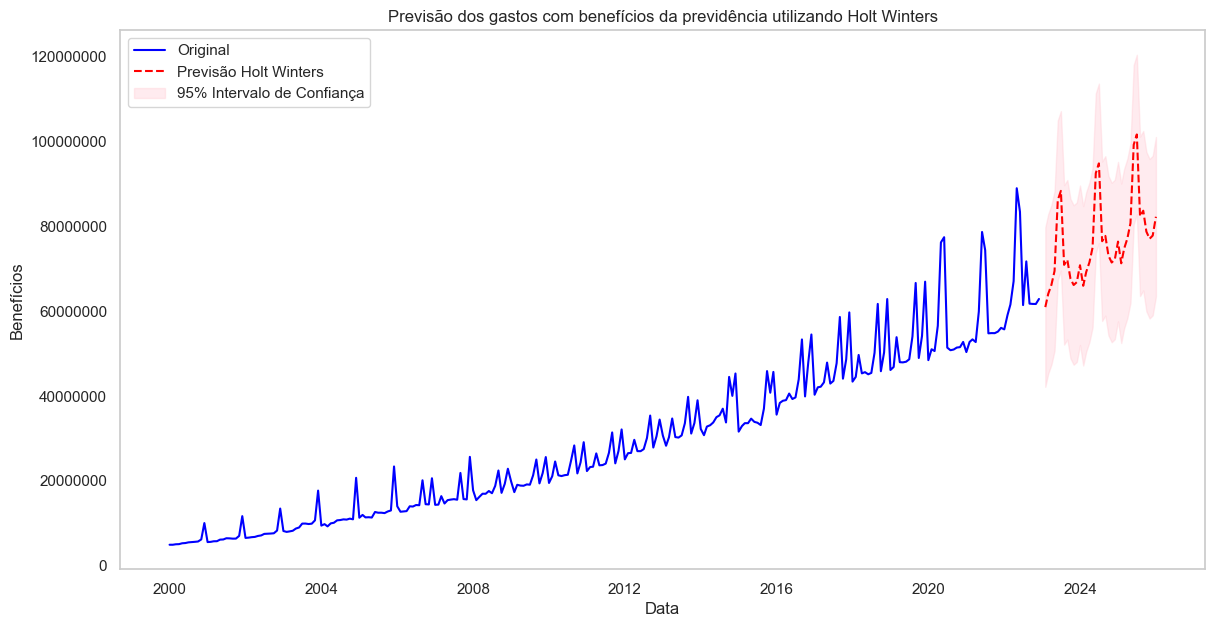

In [66]:
# Criando as previsões
forecast_periods = 36
forecast = model_fit2.forecast(steps=forecast_periods)
forecast_index = pd.date_range(start=df2.index[-1], periods=forecast_periods+1, freq='M')[1:]
forecast_values = forecast.values

# Fazendo intervalo de confiança
ci = 1.96 * np.std(forecast_values)
lower_bound = forecast_values - ci
upper_bound = forecast_values + ci

# Fazendo os gráficos
plt.figure(figsize=(14, 7))
sns.lineplot(data=df2, x=df2.index, y='Benefícios', label='Original', color='blue')
sns.lineplot(x=forecast_index, y=forecast_values, label='Previsão Holt Winters', color='red', linestyle='--')
plt.fill_between(forecast_index, lower_bound, upper_bound, color='pink', alpha=0.3, label='95% Intervalo de Confiança')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))
plt.title('Previsão dos gastos com benefícios da previdência utilizando Holt Winters')
plt.grid(False)
plt.legend()
plt.show()

Após obter o modelo Holt Winters é possível realizar previsão com dados de gastos dos benefícios, demonstrando que segue a tendência de crescimento e os efeitos sazonais